# Udacity Data Analyst Nanodegree Project 2

## Title: Data Wrangling and Analyses

## Data Source: Twitter (WeRateDogs)

                                                                                                Author:
                                                                                                David Ugochukwu Asogwa
                                                                                                June 25, 2022

# Step 1: Gathering Data

The data used for this project will be collected via twitter using the twitter API tweeepy.

In [1]:
import pandas as pd
import numpy as np
import requests as rq
import json
import tweepy as tw
from tweepy import OAuthHandler
import os
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

Importing the archive file

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

Downloading image prediction using requests.
If the request is successful, the HTTP request will return a 200 response which is the HTTP status code for a successful response

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = rq.get(url)
r.status_code

200

Use the Requests .content method and some basic file I/O to save this file to our computer. We'll open this in wb mode which stands for write binary because response.content is in bytes, not text.

In [4]:
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
        file.write(r.content)
        
df_image = pd.read_csv('image-predictions.tsv', sep = '\t')
df_image.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


Reading JSON data into python

In [5]:
tweetdata = []
with open('tweet-json.txt', 'r') as file:
  for line in file:
    data = json.loads(line)
    tweetdata.append(data)
df_tweets = pd.DataFrame(tweetdata, columns = ['id', 'retweet_count', 'favorite_count'])
df_tweets.head(2)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


In [6]:
df_tweets.to_csv('tweets.csv')

# Step 2: Accessing

First, we look through the twitter archive

In [7]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Definitely there are missing values in some columns as they do not have same number of entries. Let's see

In [8]:
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

Further assessment using .isnull() and .sum() methods showed there are missing values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls.

In [9]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
207,852553447878664193,NaN,NaN,2017-04-13 16:05:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jarod. He likes having his belly brush...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852553447...,13,10,Jarod,None,None,None,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
452,818614493328580609,NaN,NaN,2017-01-10 00:24:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bear. He's a passionate believer of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818614493...,12,10,Bear,None,None,None,None
1079,739238157791694849,NaN,NaN,2016-06-04 23:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,None,None,None


Taking random samples from the archive data showed the same. There missing values, which are the NaN values.

Using the .head() and .tail() methods to further view the begining and end of the file.

In [10]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
df_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [12]:
df_archive.duplicated().sum()

0

In [13]:
df_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

Using the .duplicated() method to check for duplicate values. There were no dulpcate rows. The unique values per column was also checked.

Now to the image recognition file

In [14]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
df_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1493,783085703974514689,https://pbs.twimg.com/media/Ct4URfWUAAQ7lKe.jpg,1,Chesapeake_Bay_retriever,0.240602,True,Airedale,0.164088,True,boxer,0.134506,True
298,671485057807351808,https://pbs.twimg.com/media/CVGYGNYXAAAQ9m-.jpg,1,Samoyed,0.627901,True,Great_Pyrenees,0.276421,True,kuvasz,0.057874,True
1953,863907417377173506,https://pbs.twimg.com/media/C_03NPeUQAAgrMl.jpg,1,marmot,0.358828,False,meerkat,0.174703,False,weasel,0.123485,False
1558,793241302385262592,https://pbs.twimg.com/media/CwIougTWcAAMLyq.jpg,1,golden_retriever,0.559308,True,Labrador_retriever,0.390222,True,cocker_spaniel,0.036316,True
1037,711998809858043904,https://pbs.twimg.com/tweet_video_thumb/CeGGkW...,1,comic_book,0.105171,False,kuvasz,0.059895,True,book_jacket,0.046638,False
307,671533943490011136,https://pbs.twimg.com/media/CVHEju0XAAEUZRY.jpg,1,hen,0.556524,False,cock,0.442033,False,black_swan,0.001181,False
1738,822244816520155136,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False
1803,832040443403784192,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True
671,683111407806746624,https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg,1,cocker_spaniel,0.901392,True,soft-coated_wheaten_terrier,0.028605,True,miniature_schnauzer,0.017805,True
440,674447403907457024,https://pbs.twimg.com/media/CVweVUfW4AACPwI.jpg,1,Brabancon_griffon,0.409909,True,malinois,0.244649,True,bull_mastiff,0.074819,True


Taking a look at the dataset for the image_recognition using .head() and .sample() methods, it is observed that the dataset contains some columns that are not necessary for the analysis such as the jpg_url, and the imag_num. These columns will probably be dropped.

Also the p1, p2 and p3 columns appears to be inconsistent with naming: some start with upper case letters while others start with lower case.

In [16]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Checking the data types of the columns, they all appear to be in the right order.

In [17]:
df_image.duplicated().sum()

0

The image recognition dataset appears to have no duplicated rows too.

Now to the tweets

In [18]:
df_tweets.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [19]:
df_tweets.sample(5)

,id,retweet_count,favorite_count
621,796080075804475393,2703,9469
735,780931614150983680,8536,24192
1409,698989035503689728,1113,3701
495,813157409116065792,2557,8588
863,762316489655476224,1298,5350


In [20]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [21]:
df_tweets.duplicated().sum()

0

The dataset is clean from all indication, but the id will be renamed to tweet_id

### Quality Issues:
df_archive
1. timestamp and retweeted_status_timestamp data type as object instead of datetime.
2. Missing values in in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls.
3. Some dog names are just letters, and some are wrong.
4. Wrong value extracted: 75 instead of 9.75.
5. Incorrect ratings in rating_numerator and rating_denominator
6. Extract device type from source, and drop columns not needed.

df_image:

7. Drop jpg_url,img_num, p1_conf, p2_conf and p3_conf columns
8. Dog breeds not consistent: Uses upper case and lower case

df_tweets:

9. Rename id to tweet_id

### Tidiness Issues:
df_archive

1. doggo, floofer, pupper and puppo are details about the stage of the dog and should be merged into one column.
2. tweet data spread across the three data frames, thus these data sets will be merged.

# Step 3: Cleaning
#### In this section, the defining, coding and testing will be carried out simultaneously in other to make quick decisions on what the next action should be

First, we make a copy of the dataframes to be used

In [22]:
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_tweets_clean = df_tweets.copy()

###### Quality issue 1
`timestamp` and `retweeted_status_timestamp` data type as object instead of datetime.

###### Define
Convert the datatype from object to datetime for timestamp and  retweeted_status_timestamp

###### Code

In [23]:
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)
df_archive_clean.retweeted_status_timestamp = pd.to_datetime(df_archive_clean.retweeted_status_timestamp)

###### Test

In [24]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

Data types successfully converted.

###### Quality issue 2
Missing values in `in_reply_to_status_id`,`in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` and `expanded_urls`

###### Define
Since these columns are not necessary for our analysis, they will be dropped using the pandas drop method. Also rows that have non-empty `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` will be dropped

###### Code
First, check for rows with non-null values, and drop all.
Then drop columns

In [25]:
print(df_archive_clean.retweeted_status_id.value_counts().sum())
print(df_archive_clean.retweeted_status_user_id.value_counts().sum())
print(df_archive_clean.retweeted_status_timestamp.value_counts().sum())

181
181
181


Since the non-null values in the rows of retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp are the same, it will be easy dropping these rows at the same time since they are retweets and add double counts to the values.

In [26]:
# drop rows with values other than NaN from retweeted_status_id
df_archive_clean = df_archive_clean[df_archive_clean['retweeted_status_id'].isna()]
df_archive_clean.info()

#drop columns
drop_columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_timestamp',
               'expanded_urls','retweeted_status_user_id','expanded_urls']
df_archive_clean.drop(columns = drop_columns, inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

###### Test

In [27]:
if 'retweeted_status_id' in df_archive_clean:
    print('Recheck!!! Implementation error\n')
else:
    print('Rows with not-null dropped. Columns dropped too\n')

print(df_archive_clean.shape)
print(df_archive_clean.isnull().sum())
df_archive_clean.head(3)

Rows with not-null dropped. Columns dropped too

(2175, 11)
tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None


In [28]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 203.9+ KB


The rows and columns have been successfully dropped from the dataframe, and all columns now have the same number of entries, thus no missing data.

###### Quality issue 3
Some dog names are just letters, and some are wrong.

###### Define
Print out the dog names that are wrong and modify them

###### Code
First, print out the wrong names

In [29]:
wrong_names = df_archive_clean.name.str.contains('^[a-z]', regex = True)
print(df_archive_clean[wrong_names].name.value_counts().sum())
df_archive_clean[wrong_names].name.value_counts().sort_index()

104


a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

There name values which are wrong are 104 in total and these names are listed above. Since we have lots of these, it will be difficult changing these names, as visual assessment have shown that some do not actually have a name, these values will be replaced with none.

In [30]:
replace_names = ['a','actually','all','an','by','getting','his','incredibly','infuriating','just','life','light','mad',
                 'my','not','officially','old','one','quite','space','such','the','this','unacceptable','very','Wishes']
df_archive_clean.name.replace(to_replace = replace_names, value = 'None', inplace = True)

###### Test

First, check if all the wrong_name values printed are replaced. Also check if other corrects names were replaced by viewing the data frame and using .value_counts()

In [31]:
wrong_names = df_archive_clean.name.str.contains('^[a-z]', regex = True)
print(df_archive_clean[wrong_names].name.value_counts().sum())
df_archive_clean.head(3)

0


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None


In [32]:
df_archive_clean.name.value_counts()

None          785
Charlie        11
Lucy           11
Cooper         10
Oliver         10
             ... 
Gustav          1
Arlen           1
Lenox           1
Jersey          1
Christoper      1
Name: name, Length: 930, dtype: int64

All successfully replaced.

###### Quality issue 4
Wrong value extracted: 75 instead of 9.75.

###### Define
Replace the number with correct value using index

###### Code

In [33]:
(df_archive_clean.rating_numerator == 75).value_counts()

False    2174
True        1
Name: rating_numerator, dtype: int64

There is a number extracted as 75. This will be replaced with 9.75, which is the correct value

In [34]:
index = df_archive_clean.index
condition_numer = df_archive_clean["rating_numerator"] == 75
denom_indices = index[condition_numer]
denom_indices_list = denom_indices.tolist()
print(denom_indices_list)

[695]


Index obtained, this will be used to replace the value.

In [35]:
df_archive_clean.loc[695,'rating_numerator'] = 9.75

###### Test

In [36]:
(df_archive_clean.rating_numerator == 75).value_counts()

False    2175
Name: rating_numerator, dtype: int64

In [37]:
(df_archive_clean.rating_numerator == 9.75).value_counts()

False    2174
True        1
Name: rating_numerator, dtype: int64

Successfully replaced!!!

In [38]:
df_archive_clean.rating_numerator.dtype

dtype('float64')

It is worth noting that the data type for the rating_numerator changes from int to float once the replacement was done.

###### Quality issue 5
Incorrect ratings in rating_numerator and rating_denominator

###### Define
Print all denominator values, and their index, then make correction if necessary or extract correct value from the tweet link

###### Code

In [39]:
all_deno = df_archive_clean.rating_denominator.value_counts()
print(all_deno)

10     2153
50        3
11        2
20        2
80        2
15        1
70        1
7         1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64


Now we have the values above 10 as denominators. Next is to print the index of the numbers above 10, manually inspect them as they are few, and make corrections where necessary.

In [40]:
index = df_archive_clean.index
condition_deno = df_archive_clean["rating_denominator"] != 10
denom_indices = index[condition_deno]
denom_indices_list = denom_indices.tolist()
print(denom_indices_list)

[313, 342, 433, 516, 902, 1068, 1120, 1165, 1202, 1228, 1254, 1274, 1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843, 2335]


The indeces now obtained, this will make assessing the file easy.

After assessing the files and checking the web pages, most of the data were found to be correct. Theactual value for the wrong ones were obtained and those the webpages could not be found will be replaced with the mean values.

index 342 and 516: Wrong values. Could not get the correct data due to insufficient details in text, thus mean value will be used for numerator and 10 for denominator.
index 313, 1068, 1165, 1202, 1662 and 2335: correct values were obtained.

Since these values appeared one, we can use the pandas replace to do this without affecting any other data.

In [41]:
denom_val = [0, 15, 7, 11, 20, 50, 2]
df_archive_clean.rating_denominator.replace(to_replace = denom_val, value = 10, inplace = True)

In [42]:
numer_index = [313, 1068, 1165, 1202, 1662, 2335]
numer_index_2 = [342, 516]
val = [13, 14, 13, 11, 10, 9]
df_archive_clean.loc[numer_index,'rating_numerator'] = val
df_archive_clean.loc[numer_index_2,'rating_numerator'] = df_archive_clean.rating_numerator.mean()

###### Test

In [43]:
all_deno = df_archive_clean.rating_denominator.value_counts()
print(all_deno)

10     2164
80        2
70        1
150       1
170       1
90        1
40        1
130       1
110       1
16        1
120       1
Name: rating_denominator, dtype: int64


All detected wrong denominator values replaced.

In [44]:
df_archive_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.175000e+03,2175.000000,2175.000000
mean,7.371205e+17,12.738959,10.434943
std,6.748668e+16,43.158319,6.850505
min,6.660209e+17,0.000000,10.000000
25%,6.768432e+17,10.000000,10.000000
50%,7.098528e+17,11.000000,10.000000
75%,7.894226e+17,12.000000,10.000000
max,8.924206e+17,1776.000000,170.000000


In [45]:
df_archive_clean.rating_numerator.value_counts()

12.000000      500
10.000000      443
11.000000      426
13.000000      309
9.000000       156
8.000000        98
7.000000        53
14.000000       44
5.000000        36
6.000000        32
3.000000        19
4.000000        16
2.000000         9
1.000000         7
0.000000         2
12.743333        2
420.000000       2
17.000000        1
44.000000        1
121.000000       1
143.000000       1
45.000000        1
20.000000        1
26.000000        1
144.000000       1
60.000000        1
165.000000       1
80.000000        1
99.000000        1
204.000000       1
1776.000000      1
27.000000        1
9.750000         1
84.000000        1
15.000000        1
182.000000       1
666.000000       1
88.000000        1
Name: rating_numerator, dtype: int64

###### Quality issue 6
Extract device type from source

###### Define
- Extract device type using string split
- create a new column, name it device_type, add the devices
- drop columns not needed, including the text column.
- change device_type to lower case

###### Code

In [46]:
for text in df_archive_clean.source:print(text)

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a h

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a h

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a h

In [47]:
df_archive_clean[['drop1','drop2','drop3']] = df_archive_clean.source.str.split('>', expand = True)
df_archive_clean[['device_type','drop4']] = df_archive_clean.drop2.str.split('<', expand = True)
df_archive_clean.drop(columns = ['source','drop1','drop2','drop3','drop4','text'], inplace = True)
df_archive_clean.device_type = df_archive_clean.device_type.str.lower()

###### Test

In [48]:
print(df_archive_clean.shape)
df_archive_clean.head()

(2175, 10)


,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,device_type
0,892420643555336193,2017-08-01 16:23:56+00:00,13.0,10,Phineas,None,None,None,None,twitter for iphone
1,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10,Tilly,None,None,None,None,twitter for iphone
2,891815181378084864,2017-07-31 00:18:03+00:00,12.0,10,Archie,None,None,None,None,twitter for iphone
3,891689557279858688,2017-07-30 15:58:51+00:00,13.0,10,Darla,None,None,None,None,twitter for iphone
4,891327558926688256,2017-07-29 16:00:24+00:00,12.0,10,Franklin,None,None,None,None,twitter for iphone


In [49]:
df_archive_clean.device_type.value_counts()

twitter for iphone     2042
vine - make a scene      91
twitter web client       31
tweetdeck                11
Name: device_type, dtype: int64

The archive data cleaning is now complete. The names can be left in the format it is since all starts with upper case, which is consistent.


##### Now to the image file

###### Quality issue 7
Drop jpg_url,img_num, p1_conf, p2_conf and p3_conf columns

###### Define
the jpg_url and img_num will be dropped using pandas drop method

###### Code

In [50]:
df_image_clean.drop(columns = ['jpg_url','img_num','p1_conf','p2_conf','p3_conf' ], inplace = True)

###### Test

In [51]:
df_image_clean.head(3)

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
0,666020888022790149,Welsh_springer_spaniel,True,collie,True,Shetland_sheepdog,True
1,666029285002620928,redbone,True,miniature_pinscher,True,Rhodesian_ridgeback,True
2,666033412701032449,German_shepherd,True,malinois,True,bloodhound,True


Image data clean enough.

###### Quality issue 8
Dog breeds (p1, p2, p3) not consistent: Uses upper case and lower case

###### Define
convert dog breed to lower case

###### Code

In [52]:
call_dat = ['p1','p2','p3']
for i in call_dat:
    df_image_clean[i] = df_image_clean[i].str.lower()

###### Test

In [53]:
df_image_clean

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
0,666020888022790149,welsh_springer_spaniel,True,collie,True,shetland_sheepdog,True
1,666029285002620928,redbone,True,miniature_pinscher,True,rhodesian_ridgeback,True
2,666033412701032449,german_shepherd,True,malinois,True,bloodhound,True
3,666044226329800704,rhodesian_ridgeback,True,redbone,True,miniature_pinscher,True
4,666049248165822465,miniature_pinscher,True,rottweiler,True,doberman,True
...,...,...,...,...,...,...,...
2070,891327558926688256,basset,True,english_springer,True,german_short-haired_pointer,True
2071,891689557279858688,paper_towel,False,labrador_retriever,True,spatula,False
2072,891815181378084864,chihuahua,True,malamute,True,kelpie,True
2073,892177421306343426,chihuahua,True,pekinese,True,papillon,True


Dog breeds all lower case.

In [54]:
df_image_clean.p1.value_counts()

golden_retriever      150
labrador_retriever    100
pembroke               89
chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

##### Now to the tweets file

###### Quality issue 9
Rename id to tweet_id

###### Define
Rename id in tweets data to tweet_id

###### Code

In [55]:
df_tweets_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

###### Test

In [56]:
df_tweets_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


Perfect!!!

##### Now to tidiness issues 

###### Tidiness issue 1
doggo, floofer, pupper and puppo are details about the stage of the dog and should be merged into one column.

###### Define
- Convert 'None' in doggo, floofer, pupper and poppo columns to NaN
- Merge doggo, floofer, pupper and poppo into one column named stages
- drop doggo, floofer, pupper and poppo columns

###### Code

In [57]:
def changeNone(column):
    if (column):
        df_archive_clean[column] = df_archive_clean[column].replace('None', np.nan)
        return 'None value changed'
    else:
        return 'No true value passed to change'

changeNone('doggo')
changeNone('puppo')
changeNone('pupper')
changeNone('floofer')

'None value changed'

In [58]:
df_archive_clean['stages'] = df_archive_clean[df_archive_clean.columns[5:9]].apply(
    lambda y: ','.join(y.dropna().astype(str)), axis = 1)

df_archive_clean.drop(columns = ['doggo','floofer','pupper','puppo'], inplace = True)

###### Test

In [59]:
df_archive_clean.head(3)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,device_type,stages
0,892420643555336193,2017-08-01 16:23:56+00:00,13.0,10,Phineas,twitter for iphone,
1,892177421306343426,2017-08-01 00:17:27+00:00,13.0,10,Tilly,twitter for iphone,
2,891815181378084864,2017-07-31 00:18:03+00:00,12.0,10,Archie,twitter for iphone,


In [60]:
df_archive_clean.stages.value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stages, dtype: int64

cool !!!

###### Tidiness issue 2
tweet data spread across the three data frames, thus these data sets will be merged.

###### Define
- Merge the three files
- Drop null values

###### Code

In [61]:
df_x = pd.merge(df_image_clean, df_tweets_clean, on = 'tweet_id', how = 'outer')
df = pd.merge(df_x, df_archive_clean, on = 'tweet_id', how = 'outer')
df.dropna(inplace = True)
df.reset_index(drop = True)
df.duplicated().sum()

0

In [62]:
df.dtypes

tweet_id                            int64
p1                                 object
p1_dog                             object
p2                                 object
p2_dog                             object
p3                                 object
p3_dog                             object
retweet_count                     float64
favorite_count                    float64
timestamp             datetime64[ns, UTC]
rating_numerator                  float64
rating_denominator                float64
name                               object
device_type                        object
stages                             object
dtype: object

A problem is encountered after the merging, data type change. Data type conversion will be done to get the columns back to their original data types:
- p1_dog: bool
- p2_dog: bool
- p3_dog: bool
- rating_denominator: int

A function will be used here

In [63]:
# A function to change data type
def changeDtype(column_name,data_type):
    try:
        df[column_name] = df[column_name].astype(data_type)
        return 'Data type conversion Successful'
    except:
        return 'Not Successful'

In [64]:
changeDtype('p1_dog', bool)
changeDtype('p2_dog', bool)
changeDtype('p3_dog', bool)
changeDtype('rating_denominator', int)
changeDtype('retweet_count', int)
changeDtype('favorite_count', int)

'Data type conversion Successful'

###### Test

In [65]:
print(df.shape)
df.head()

(1994, 15)


,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog,retweet_count,favorite_count,timestamp,rating_numerator,rating_denominator,name,device_type,stages
0,666020888022790149,welsh_springer_spaniel,True,collie,True,shetland_sheepdog,True,532,2535,2015-11-15 22:32:08+00:00,8.0,10,None,twitter for iphone,
1,666029285002620928,redbone,True,miniature_pinscher,True,rhodesian_ridgeback,True,48,132,2015-11-15 23:05:30+00:00,7.0,10,None,twitter for iphone,
2,666033412701032449,german_shepherd,True,malinois,True,bloodhound,True,47,128,2015-11-15 23:21:54+00:00,9.0,10,None,twitter for iphone,
3,666044226329800704,rhodesian_ridgeback,True,redbone,True,miniature_pinscher,True,147,311,2015-11-16 00:04:52+00:00,6.0,10,None,twitter for iphone,
4,666049248165822465,miniature_pinscher,True,rottweiler,True,doberman,True,41,111,2015-11-16 00:24:50+00:00,5.0,10,None,twitter for iphone,


In [66]:
df.dtypes

tweet_id                            int64
p1                                 object
p1_dog                               bool
p2                                 object
p2_dog                               bool
p3                                 object
p3_dog                               bool
retweet_count                       int32
favorite_count                      int32
timestamp             datetime64[ns, UTC]
rating_numerator                  float64
rating_denominator                  int32
name                               object
device_type                        object
stages                             object
dtype: object

Conversion Successful !!!

### Saving the final data set

In [67]:
df.to_csv('twitter_archive_master.csv', index = False)

# Analyzing and Visualizing Data

### Question 1: Which year has the most dog review in the data set?
To answer this question, we will create a function which takes in the year as input and calculates the number of tweets in that particular year. Any year not in the data will give 0.

Also a function will be created for bar plotting

In [68]:
def Year(year):
    counter = 0
    for i in df.timestamp:
        if year in i:
            counter += 1
    print('The year', year, 'has ', counter,' dog rating')

In [69]:
def bar_plot(x_axis_data, y_axis_data, title, x_label, y_label):
    plt.figure(figsize = (7,7));
    plt.bar(x_axis_data, y_axis_data);
    plt.xticks(rotation = 90);
    plt.title(title);
    plt.xlabel(x_label);
    plt.ylabel(y_label)

In [70]:
df['timestamp'] = df['timestamp'].astype(str)
Year('2015')

The year 2015 has  663  dog rating


In [71]:
Year('2016')

The year 2016 has  974  dog rating


In [72]:
Year('2017')

The year 2017 has  357  dog rating


In [73]:
Year('2022')

The year 2022 has  0  dog rating


From the answers obtained, it can be see that the highest number of dog reviews was done in 2016 with a total of 974 ratings. This can also be seen in the bar chart below.

Year 2022 was added above just to test if the code actually works okay, and since there is no 2022 data, the actual value expected is 0, which is correct.

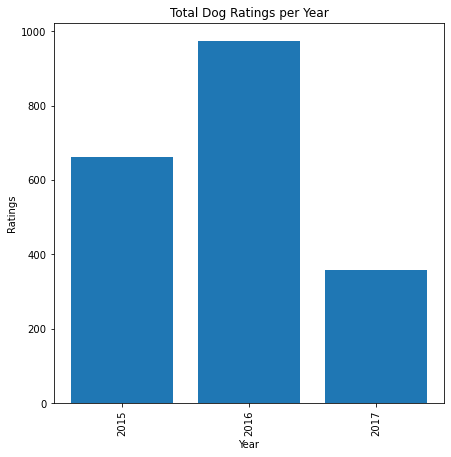

In [74]:
year = [2015, 2016, 2017]
ratings = [663, 974, 357]
bar_plot(year, ratings, 'Total Dog Ratings per Year', 'Year', 'Ratings');
plt.xticks([2015, 2016, 2017]);

The bar chart gives a better visualization of the ratings in the years under review. It shows there was an increase in the ratings from 2015 to 2016, then a huge decline in 2017.

### Question 2: Which dog type has the highest rating?

This can be obtained usind the panda describe method.

In [75]:
index = df.index
condition_num = df["rating_numerator"] == df.rating_numerator.max()
num_indices = index[condition_num]
num_indices_list = num_indices.tolist()
print(num_indices_list)

df.loc[[1270]]

[1270]


,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog,retweet_count,favorite_count,timestamp,rating_numerator,rating_denominator,name,device_type,stages
1270,749981277374128128,bow_tie,False,sunglasses,False,sunglass,False,2772,5569,2016-07-04 15:00:45+00:00,1776.0,10,Atticus,tweetdeck,


The dog with the higest rating is `Atticus`, with a rating of `1776` and tweet_id of `749981277374128128`. This rating was done in 2016. An issue here is that the machine learning algorithms used flagged the image as `not a dog`.

### Question 3:  Which dog(s) type has the lowest rating?

In [76]:
index = df.index
condition_num = df["rating_numerator"] == df.rating_numerator.min()
num_indices = index[condition_num]
num_indices_list = num_indices.tolist()
print(num_indices_list)

df.loc[[1240, 1824]]

[1240, 1824]


,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog,retweet_count,favorite_count,timestamp,rating_numerator,rating_denominator,name,device_type,stages
1240,746906459439529985,traffic_light,False,fountain,False,space_shuttle,False,336,3168,2016-06-26 03:22:31+00:00,0.0,10,None,twitter for iphone,
1824,835152434251116546,swing,False,american_staffordshire_terrier,True,staffordshire_bullterrier,True,3443,24574,2017-02-24 15:40:31+00:00,0.0,10,None,twitter for iphone,


Is it not strange that two dogs with the lowest rating (zero) have no names? Their tweet_id are `746906459439529985` and `835152434251116546` with both tweets made in 2016 and 2017 respectively.

### Question 4: What is the device in which most tweets are made?

In [77]:
df.device_type.value_counts()

twitter for iphone    1955
twitter web client      28
tweetdeck               11
Name: device_type, dtype: int64

From the vlaue counts data, it is obvious that most tweets was made from an iPhone. Let's visualize this.

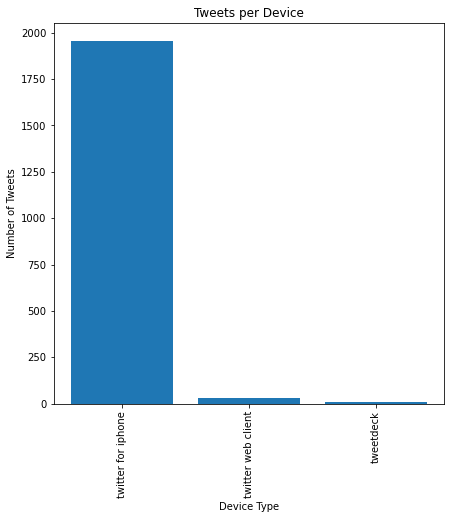

In [78]:
device = ['twitter for iphone', 'twitter web client', 'tweetdeck']
bar_plot(device, df.device_type.value_counts(), 'Tweets per Device', 'Device Type', 'Number of Tweets');
plt.xticks(device);

In [79]:
(1955/df.device_type.value_counts().sum())*100

98.04413239719158

It is quite obvious that most tweets were made from an iphone as can be seen from the bar chart above and the percentage calculation of 98% approximately. And this result is skewed towards the right

### Question 5: Which machine learning algorithm predicted more dogs correctly?

In [80]:
def algorithm(alg):
    if alg in df.columns:
        value = df[alg].value_counts()
    print('The algorithm', alg, 'predicted: \n')
    print(value)


In [81]:
algorithm('p1_dog')

The algorithm p1_dog predicted: 

True     1477
False     517
Name: p1_dog, dtype: int64


In [82]:
algorithm('p2_dog')

The algorithm p2_dog predicted: 

True     1495
False     499
Name: p2_dog, dtype: int64


In [83]:
algorithm('p3_dog')

The algorithm p3_dog predicted: 

True     1446
False     548
Name: p3_dog, dtype: int64


It appears that algorithm p2 made higher correct predictions. This will be clear with a visualization.

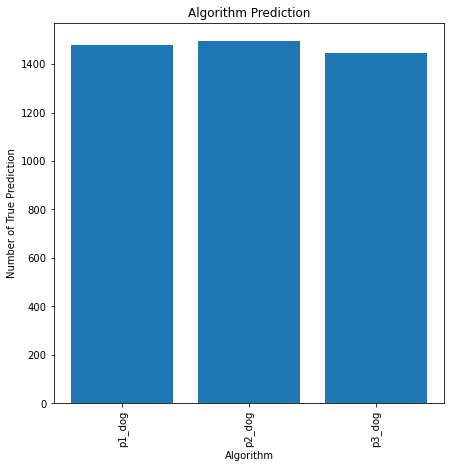

In [84]:
algorithm = ['p1_dog', 'p2_dog', 'p3_dog']
counts = [1477, 1495, 1446 ]
bar_plot(algorithm, counts, 'Algorithm Prediction', 'Algorithm', 'Number of True Prediction');
plt.xticks(algorithm);

This seems to be a close combat between the three algorithms, but p2_dog came out tops with 1495 True predictions

### Question 6: Which machine learning algorithm had the worst prediction?

These data can be gathered from question 5 above.

From the data, p3_dog had the worst predictions with 548 False predictions made. The visulization below shows the results

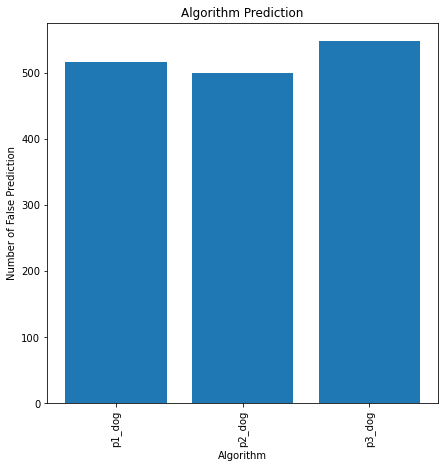

In [85]:
algorithm = ['p1_dog', 'p2_dog', 'p3_dog']
counts = [517, 499, 548 ]
bar_plot(algorithm, counts, 'Algorithm Prediction', 'Algorithm', 'Number of False Prediction');
plt.xticks(algorithm);

### Question 7: Which dog stage has the highest number?

In [86]:
def dogstage(stage):
    if stage in df.columns:
        value = df[stage].value_counts()
    print('The dog stages are: \n')
    print(value)

In [88]:
dogstage('stages')

The dog stages are: 

                 1688
pupper            203
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: stages, dtype: int64


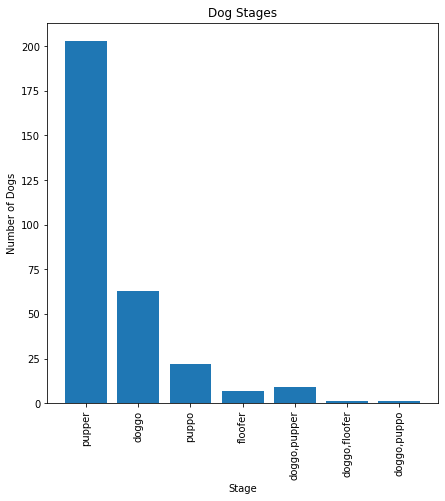

In [90]:
stage = ['pupper','doggo','puppo','floofer','doggo,pupper','doggo,floofer','doggo,puppo']
counts = [203, 63, 22, 7, 9, 1, 1]
bar_plot(stage, counts, 'Dog Stages', 'Stage', 'Number of Dogs');
plt.xticks(stage);

Evidently, the pupper stage is the stage at which most of the rated dogs are. Though there were dogs whose stages are unknown, and thus are not included in this chart.